In [19]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
data_cardio = pd.read_csv('cardio_train.txt', sep = ';')
data_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [21]:
data_cardio.rename(columns={'gluc': 'glucose_level', 'alco': 'alcohol_intake', 'active':'physical_activity',
                            'cardio':'cardio_disease'}, inplace=True)
data_cardio.age = round(data_cardio.age / 365)
data_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease
0,988,62.0,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.0,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.0,1,165,70.0,120,80,1,1,0,0,1,0
3,991,40.0,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.0,1,155,62.0,120,80,1,1,0,0,1,0


In [22]:
# data_cardio.to_excel('Cardiovascular_Disease_Detection_data.xlsx')

In [23]:
data_cardio.shape

(69301, 13)

In [24]:
data_cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.338177,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.765427,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
import sweetviz as sv

In [ ]:
my_report = sv.analyze(data_cardio)
my_report.show_html()

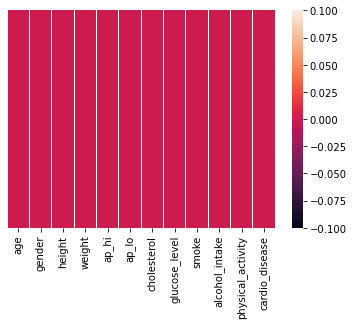

In [6]:
sns.heatmap(data_cardio.drop(['id'], axis =1).isnull(), yticklabels=False) # to check null values

#### as there are no null values, lets check outliers in height, weight, ap_hi and ap_lo

In [26]:
outlier_columns = ['height', 'weight', 'ap_hi', 'ap_lo']

def outlier_finding():
    for col in outlier_columns:
        IQR = data_cardio[col].quantile(0.75) - data_cardio[col].quantile(0.25)
        print(col,':')
        print('IQR value of ', col,' is = ',IQR)

        lower_fence = data_cardio[col].quantile(0.25) - (IQR*1.5)
        upper_fence = data_cardio[col].quantile(0.75) + (IQR*1.5)
        print(f'for normal cases, lower fence = {lower_fence} and upper_fence = {upper_fence}')
       
    # outlier count
        outlier_count = data_cardio[(data_cardio[col] < lower_fence) | (data_cardio[col] > upper_fence)].shape[0]
        print(f'\toutlier count within normal range for {col} is {outlier_count} and its % = {round(outlier_count / data_cardio.shape[0]*100, 2)}%')
        
    # for extreme values
        lower_fence_extreme = data_cardio[col].quantile(0.25) - (IQR*3)
        upper_fence_extreme = data_cardio[col].quantile(0.75) + (IQR*3)
        print(f'for extreme cases, lower fence = {lower_fence_extreme} and upper_fence = {upper_fence_extreme}')
        
    # outlier count
        outlier_count_extreme = data_cardio[(data_cardio[col] < lower_fence_extreme) | 
                                      (data_cardio[col] > upper_fence_extreme)].shape[0]
        print(f'\toutlier count within extreme range for {col} is {outlier_count_extreme} and its % = {round(outlier_count_extreme / data_cardio.shape[0]*100, 2)}%\n')


In [27]:
outlier_finding()

height :
IQR value of  height  is =  11.0
for normal cases, lower fence = 142.5 and upper_fence = 186.5
	outlier count within normal range for height is 515 and its % = 0.74%
for extreme cases, lower fence = 126.0 and upper_fence = 203.0
	outlier count within extreme range for height is 92 and its % = 0.13%

weight :
IQR value of  weight  is =  17.0
for normal cases, lower fence = 39.5 and upper_fence = 107.5
	outlier count within normal range for weight is 1802 and its % = 2.6%
for extreme cases, lower fence = 14.0 and upper_fence = 133.0
	outlier count within extreme range for weight is 168 and its % = 0.24%

ap_hi :
IQR value of  ap_hi  is =  20.0
for normal cases, lower fence = 90.0 and upper_fence = 170.0
	outlier count within normal range for ap_hi is 1419 and its % = 2.05%
for extreme cases, lower fence = 60.0 and upper_fence = 200.0
	outlier count within extreme range for ap_hi is 287 and its % = 0.41%

ap_lo :
IQR value of  ap_lo  is =  10.0
for normal cases, lower fence = 65.

### Removing Outliers of 'ap_lo'

In [28]:
def update_outliers(low_bp):
    if low_bp < 50:
        return 81
    elif low_bp > 120:
        return 81
    else :
        return low_bp
    
# return round(data_cardio[(data_cardio.ap_lo > 50 )& (data_cardio.ap_lo<120)].ap_lo.mean())  = 81.0

In [29]:
# for new_col in 'ap_lo_new

data_cardio['ap_lo_new'] = data_cardio.ap_lo.apply(update_outliers)

In [30]:
# checking the o/p after apply method

data_cardio[(data_cardio.ap_lo_new <50) | (data_cardio.ap_lo_new >120)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease,ap_lo_new


In [31]:
# droping the outliers of height

print(data_cardio.shape)
df = data_cardio[(data_cardio.height < 126) | (data_cardio.height > 203)]
data_cardio.drop(df.index, inplace=True)
data_cardio.shape

(69301, 14)


(69209, 14)

In [32]:
# droppiing the outliers of weight

print(data_cardio.shape)
df = data_cardio[(data_cardio.weight < 39.5) | (data_cardio.weight > 133)]
data_cardio.drop(df.index, inplace=True)
data_cardio.shape

(69209, 14)


(69001, 14)

In [33]:
# droppiing the outliers of ap_hi

print(data_cardio.shape)
df = data_cardio[(data_cardio.ap_hi < 90) | (data_cardio.ap_hi > 200)]
data_cardio.drop(df.index, inplace=True)
data_cardio.shape

(69001, 14)


(68587, 14)

In [34]:
data_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease,ap_lo_new
0,988,62.0,1,155,69.0,130,80,2,2,0,0,1,0,80
1,989,40.0,1,163,71.0,110,70,1,1,0,0,1,1,70
2,990,60.0,1,165,70.0,120,80,1,1,0,0,1,0,80
3,991,40.0,2,165,85.0,120,80,1,1,1,1,1,0,80
4,992,64.0,1,155,62.0,120,80,1,1,0,0,1,0,80


In [35]:
data_cardio.drop(['ap_lo'], axis = 1, inplace=True)
data_cardio.head()

,id,age,gender,height,weight,ap_hi,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease,ap_lo_new
0,988,62.0,1,155,69.0,130,2,2,0,0,1,0,80
1,989,40.0,1,163,71.0,110,1,1,0,0,1,1,70
2,990,60.0,1,165,70.0,120,1,1,0,0,1,0,80
3,991,40.0,2,165,85.0,120,1,1,1,1,1,0,80
4,992,64.0,1,155,62.0,120,1,1,0,0,1,0,80


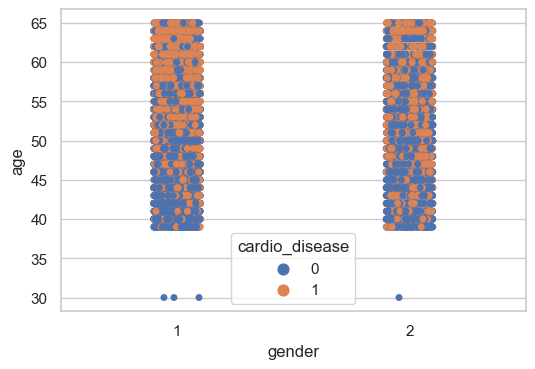

In [22]:
sns.set(style="whitegrid")
ax = sns.stripplot(x ='gender', y= 'age', hue = 'cardio_disease', data = data_cardio)

In [36]:
data_cardio[data_cardio.age == 30]

,id,age,gender,height,weight,ap_hi,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease,ap_lo_new
5520,8850,30.0,1,175,59.0,120,1,1,0,0,1,0,80
21644,31922,30.0,2,175,92.0,100,1,1,0,0,1,0,60
29967,43842,30.0,1,159,59.0,120,1,1,0,0,1,0,80
55206,79749,30.0,1,160,59.0,110,1,1,0,0,1,0,70


#### as of now 'ap_hi' and 'ap_lo' -> 'max' value is too high so first need to analyse these two columns

In [37]:
data_cardio[(data_cardio.ap_hi < data_cardio.ap_lo_new)]

,id,age,gender,height,weight,ap_hi,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease,ap_lo_new
22197,32702,56.0,2,178,84.0,95,1,1,0,1,0,1,100
45818,66423,42.0,2,178,92.0,90,1,1,1,0,1,0,100
52069,75277,58.0,1,164,86.0,90,1,1,0,1,1,1,120


In [38]:
print(data_cardio.shape)
df = data_cardio[(data_cardio.ap_hi < data_cardio.ap_lo_new)]
data_cardio.drop(df.index, inplace = True)
data_cardio.shape

(68587, 13)


(68584, 13)

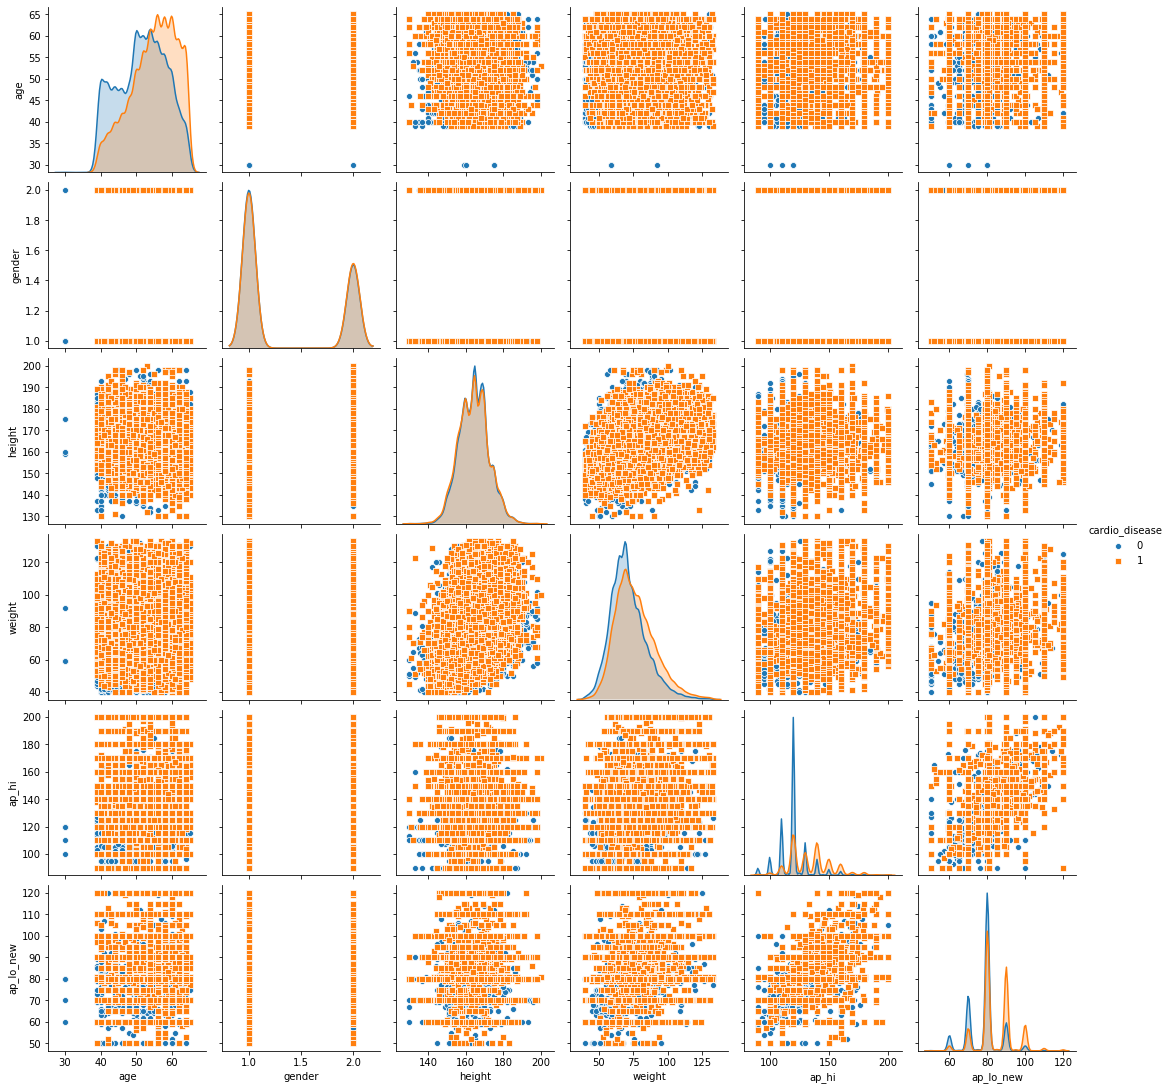

In [18]:
sns.pairplot(data_cardio,vars=['age', 'gender', 'height','weight', 'ap_hi', 'ap_lo_new'], hue="cardio_disease", markers=["o", "s"])

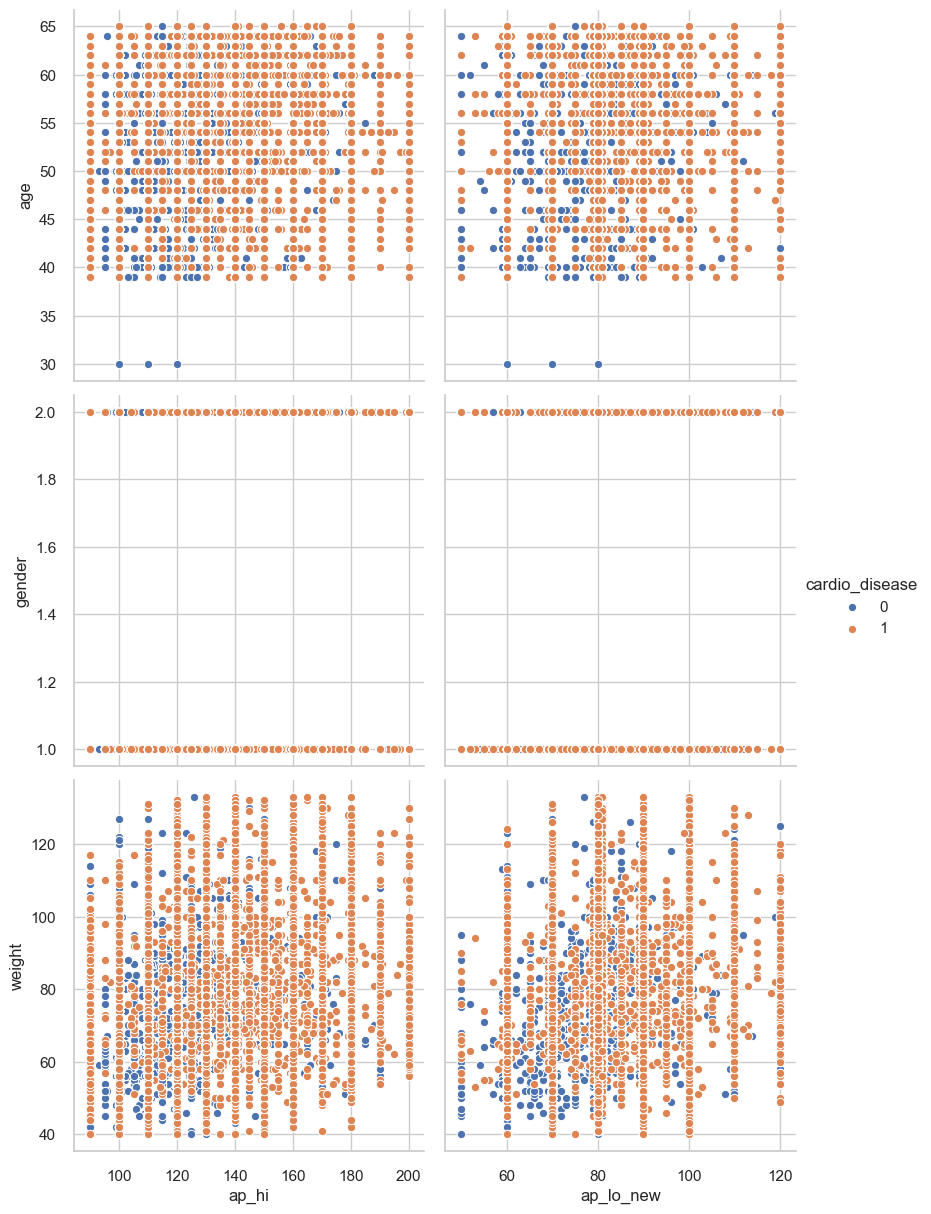

In [31]:
sns.pairplot(data_cardio, x_vars=["ap_hi", "ap_lo_new"], y_vars=["age", "gender", "weight"], hue ='cardio_disease', 
             height = 4 )

In [39]:
data_cardio.drop('id', axis=1, inplace=True)
data_cardio.head()

,age,gender,height,weight,ap_hi,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease,ap_lo_new
0,62.0,1,155,69.0,130,2,2,0,0,1,0,80
1,40.0,1,163,71.0,110,1,1,0,0,1,1,70
2,60.0,1,165,70.0,120,1,1,0,0,1,0,80
3,40.0,2,165,85.0,120,1,1,1,1,1,0,80
4,64.0,1,155,62.0,120,1,1,0,0,1,0,80


In [40]:
data_cardio.shape

(68584, 12)

In [41]:
data_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'cholesterol',
       'glucose_level', 'smoke', 'alcohol_intake', 'physical_activity',
       'cardio_disease', 'ap_lo_new'],
      dtype='object')

In [42]:
X= data_cardio[['age', 'gender', 'height', 'weight', 'ap_hi','ap_lo_new', 'cholesterol','glucose_level', 'smoke', 'alcohol_intake',
                'physical_activity','cardio_disease']]

In [43]:
X.shape

(68584, 12)

## Checking Multicolinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)


from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

TypeError: '(slice(None, None, None), 0)' is an invalid key

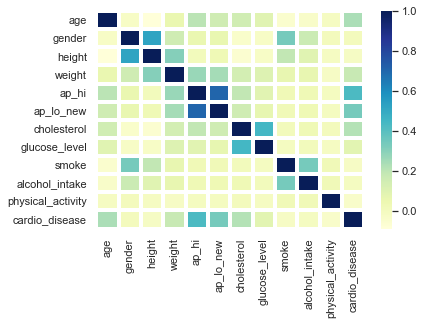

In [26]:
sns.heatmap(X.corr(), linewidths=3, cmap="YlGnBu")

## Clustering

In [41]:
#elbow method
from sklearn.cluster import KMeans

In [42]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


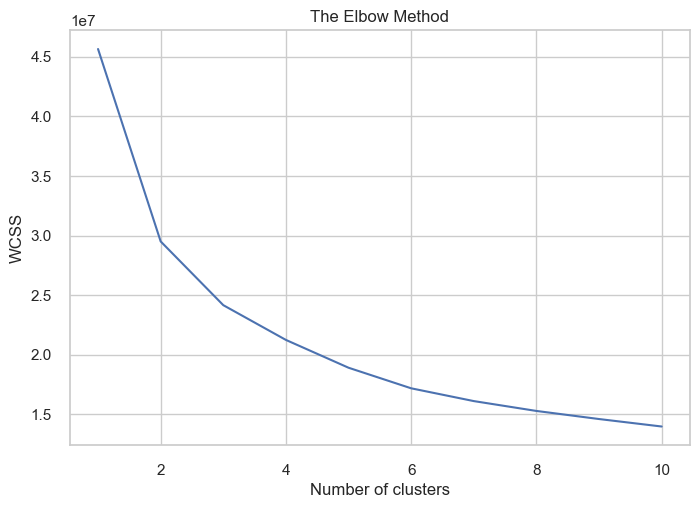

In [41]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [88]:
!pip install kneed

In [43]:
# method 2 for finding the value of 'k'
from kneed import KneeLocator

In [44]:
kn =KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing')
print(f'best possible no of clusters are: {kn.knee}')

best possible no of clusters are: 3


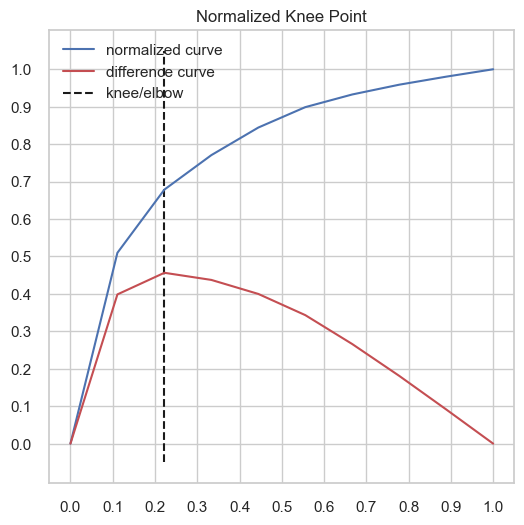

In [43]:
kn.plot_knee_normalized()

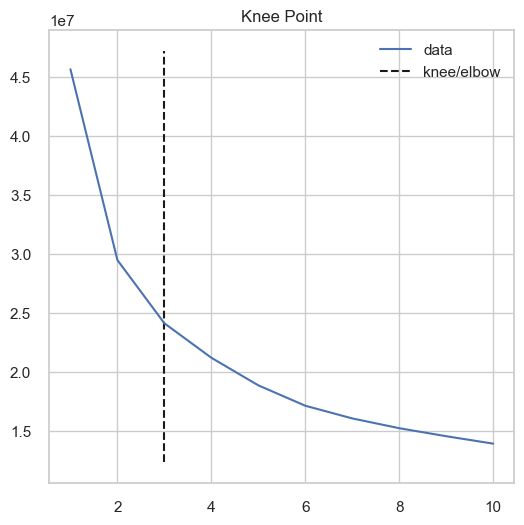

In [44]:
kn.plot_knee()

## Divide the data into clusters

In [45]:
kmeans = KMeans(n_clusters=kn.knee, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X) #  divide data into clusters
X['Cluster']=y_kmeans  # create a new column in dataset for storing the cluster information
X.head()

,age,gender,height,weight,ap_hi,ap_lo_new,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease,Cluster
0,62.0,1,155,69.0,130,80,2,2,0,0,1,0,0
1,40.0,1,163,71.0,110,70,1,1,0,0,1,1,0
2,60.0,1,165,70.0,120,80,1,1,0,0,1,0,0
3,40.0,2,165,85.0,120,80,1,1,1,1,1,0,2
4,64.0,1,155,62.0,120,80,1,1,0,0,1,0,0


## Creating different datasets for different clusters

In [46]:
X.groupby('Cluster').count()

,age,gender,height,weight,ap_hi,ap_lo_new,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease
Cluster,,,,,,,,,,,,
0,34770,34770,34770,34770,34770,34770,34770,34770,34770,34770,34770,34770
1,16950,16950,16950,16950,16950,16950,16950,16950,16950,16950,16950,16950
2,16864,16864,16864,16864,16864,16864,16864,16864,16864,16864,16864,16864


## Creatinng differnt models to fid best model with best parameters

In [58]:
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score


In [67]:
def get_best_params_for_naive_bayes(train_x,train_y):
    # initializing with different combination of parameters
    param_grid = {
        "var_smoothing": [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,0.1,0.01,0.001,0.5,0.05,]
    }

    #Creating an object of the Grid Search class
    grid = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=3,  verbose=3)

    #finding the best parameters
    grid.fit(X_scaled_train, y_train)

    #extracting the best parameters
    var_smoothing = grid.best_params_['var_smoothing']

    #creating a new model with the best parameters
    gnb = GaussianNB(var_smoothing=var_smoothing)

    # training the mew model
    gnb.fit(X_scaled_train, y_train)

    return gnb   


In [61]:
def get_best_params_for_xgboost(train_x,train_y):
    
    # initializing with different combination of parameters
    param_grid_xgboost = {
        "n_estimators": [50,100, 130],
        "max_depth": range(3, 11, 1), 
        "random_state":[0,50,100]
    }

    # Creating an object of the Grid Search class
    grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=2,n_jobs=-1)

    # finding the best parameters
    grid.fit(X_scaled_train, y_train)

    # extracting the best parameters
    random_state = grid.best_params_['random_state']
    max_depth = grid.best_params_['max_depth']
    n_estimators = grid.best_params_['n_estimators']

    # creating a new model with the best parameters
    xgb = XGBClassifier(random_state=random_state, max_depth=max_depth,n_estimators= n_estimators, n_jobs=-1 )

    # training the mew model
    xgb.fit(X_scaled_train, y_train)
    return xgb




In [62]:
def get_best_model(train_x,train_y,test_x,test_y):
    """
        Method Name: get_best_model
        Description: Find out the Model which has the best AUC score.
        Output: The best model name and the model object
    """
# calculating the accuracy_score or AUC for XGBoost

    xgboost= get_best_params_for_xgboost(X_scaled_train, y_train) # func returns 'xgb' i.e trained model
    prediction_xgboost = xgboost.predict(X_scaled_test) # Predictions using the XGBoost Model

    if len(y_test.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        xgboost_score = accuracy_score(y_test, prediction_xgboost)
    else:
        xgboost_score = roc_auc_score(y_test, prediction_xgboost) # AUC for XGBoost

# calculating the accuracy_score or AUC for Naive Bayes

    naive_bayes=get_best_params_for_naive_bayes(X_scaled_train, y_train) # func returns 'gnb' i.e trained model
    prediction_naive_bayes=naive_bayes.predict(X_scaled_test) # prediction using the Random Forest Algorithm

    if len(y_test.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        naive_bayes_score = accuracy_score(y_test,prediction_naive_bayes)
    else:
        naive_bayes_score = roc_auc_score(y_test, prediction_naive_bayes) # AUC for Random Forest

#comparing the two models
    if(naive_bayes_score <  xgboost_score):
        return 'XGBoost',xgboost
    else:
        return 'NaiveBayes',naive_bayes

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle 

In [104]:
model_all= []
for i in range(0,kn.knee):
    cluster_X = X[X.Cluster==i]
    
    # prepare feature and label columns
    cluster_X_featues =cluster_X.drop(['cardio_disease', 'Cluster'], axis = 1)
    cluster_X_labels = cluster_X.cardio_disease
    
    # train_test_split
    X_train, X_test, y_train, y_test = train_test_split(cluster_X_featues, cluster_X_labels, test_size=0.20, random_state=42)
    
    # data preprocessing/feature scaling
    standard_scaler = StandardScaler()
    X_scaled_train = standard_scaler.fit_transform(X_train)
    X_scaled_test = standard_scaler.transform(X_test)
    
    #getting the best model for each of the clusters
    best_model_name,best_model= get_best_model( X_scaled_train,y_train, X_scaled_test,y_test)
    print(f'for cluster_X_{i} best_model is {best_model}')
       
    # Save the trained model as a pickle string. 
    saved_model = 'saved_model_'+str(i)+'.pkl'
    pickle.dump(best_model, open(saved_model, 'wb'))

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  7.0min finished


Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=0.692, total=   0.1s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=0.692, total=   0.1s
[CV] var_smoothing=1e-11 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. var_smoothing=1e-11, score=0.686, total=   0.1s
[CV] var_smoothing=1e-10 .............................................
[CV] ................. var_smoothing=1e-10, score=0.692, total=   0.1s
[CV] var_smoothing=1e-10 .............................................
[CV] ................. var_smoothing=1e-10, score=0.692, total=   0.1s
[CV] var_smoothing=1e-10 .............................................
[CV] ................. var_smoothing=1e-10, score=0.686, total=   0.1s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.692, total=   0.1s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.692, total=   0.1s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.686, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.8s finished


Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.3min finished


Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=0.840, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=0.840, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=0.840, total=   0.0s
[CV] var_smoothing=1e-10 .............................................
[CV] ................. var_smoothing=1e-10, score=0.840, total=   0.0s
[CV] var_smoothing=1e-10 .............................................
[CV] ................. var_smoothing=1e-10, score=0.840, total=   0.0s
[CV] var_smoothing=1e-10 .............................................
[CV] ................. var_smoothing=1e-10, score=0.840, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.840, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.840, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.840, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] ................. var_smoothing=1e-08, score=0.840, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] ................. var_smoothing=1e-08, score=0.840, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] ................. var_smoothing=1e-08, score=0.840, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] ................. var_smoothing=1e-07, score=0.840, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s finished


Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.1min finished


Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=0.642, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=0.648, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=0.656, total=   0.0s
[CV] var_smoothing=1e-10 .............................................
[CV] ................. var_smoothing=1e-10, score=0.642, total=   0.0s
[CV] var_smoothing=1e-10 .............................................
[CV] ................. var_smoothing=1e-10, score=0.648, total=   0.0s
[CV] var_smoothing=1e-10 .............................................
[CV] ................. var_smoothing=1e-10, score=0.656, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.642, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.648, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.656, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] ................. var_smoothing=1e-08, score=0.642, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] ................. var_smoothing=1e-08, score=0.648, total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV] ................. var_smoothing=1e-08, score=0.656, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] ................. var_smoothing=1e-07, score=0.642, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s finished


In [ ]:
# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
knn_from_pickle.predict(X_test)

# creating model using pycaret

In [44]:
# Importing module and initializing setup
from pycaret.classification import *

In [45]:
data_cardio

,age,gender,height,weight,ap_hi,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease,ap_lo_new
0,62.0,1,155,69.0,130,2,2,0,0,1,0,80
1,40.0,1,163,71.0,110,1,1,0,0,1,1,70
2,60.0,1,165,70.0,120,1,1,0,0,1,0,80
3,40.0,2,165,85.0,120,1,1,1,1,1,0,80
4,64.0,1,155,62.0,120,1,1,0,0,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,53.0,2,168,76.0,120,1,1,1,0,1,0,80
69297,62.0,1,158,126.0,140,2,2,0,0,1,1,90
69298,52.0,2,183,105.0,180,3,1,0,1,0,1,90
69299,61.0,1,163,72.0,135,1,2,0,0,0,1,80


In [46]:
data_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'cholesterol',
       'glucose_level', 'smoke', 'alcohol_intake', 'physical_activity',
       'cardio_disease', 'ap_lo_new'],
      dtype='object')

In [47]:
cardio_data = data_cardio[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo_new', 'cholesterol', 'glucose_level', 
                           'smoke', 'alcohol_intake', 'physical_activity', 'cardio_disease']]
cardio_data.head()

,age,gender,height,weight,ap_hi,ap_lo_new,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease
0,62.0,1,155,69.0,130,80,2,2,0,0,1,0
1,40.0,1,163,71.0,110,70,1,1,0,0,1,1
2,60.0,1,165,70.0,120,80,1,1,0,0,1,0
3,40.0,2,165,85.0,120,80,1,1,1,1,1,0
4,64.0,1,155,62.0,120,80,1,1,0,0,1,0


In [52]:
# Setting up Environment

print(f'for model cardio_data details are: ')
clf1 = setup(data = cardio_data, target = 'cardio_disease', train_size = 0.75, sampling = True, sample_estimator = None, 
             categorical_features = None, ordinal_features = None,
             high_cardinality_features = None,normalize = True, transformation = True, pca = True, 
             pca_components = None, ignore_low_variance = False, combine_rare_levels = False, 
             rare_level_threshold = 0.10, bin_numeric_features = None, remove_outliers = False, 
             outliers_threshold = 0.05, remove_multicollinearity = False, multicollinearity_threshold = 0.9, 
             create_clusters = False, cluster_iter = 20, polynomial_features = False, polynomial_degree = 2, 
             trigonometry_features = False, polynomial_threshold = 0.1, group_features = None, group_names = None, 
             feature_selection = True, feature_selection_threshold = 0.8, feature_interaction = False, 
             interaction_threshold = 0.01, session_id = None, silent=False, profile = False)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6344
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(68584, 12)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [53]:
# Compare Models
print(f'for model cardio_data details are: ')
compare_models(blacklist = ["catboost","qda"], fold = 5,  round = 4, turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.730900,0.796000,0.692600,0.749400,0.719800,0.461800
1,Extreme Gradient Boosting,0.730600,0.796300,0.691100,0.749700,0.719200,0.461100
2,Light Gradient Boosting Machine,0.730100,0.795300,0.693300,0.747600,0.719400,0.460100
3,Logistic Regression,0.728800,0.788300,0.692800,0.745900,0.718400,0.457600
4,Ridge Classifier,0.728400,0.000000,0.691700,0.745800,0.717700,0.456800
5,Linear Discriminant Analysis,0.728400,0.788000,0.691700,0.745800,0.717700,0.456800
6,SVM - Linear Kernel,0.727200,0.000000,0.668100,0.757600,0.709600,0.454200
7,Ada Boost Classifier,0.726000,0.788100,0.691900,0.741800,0.716000,0.451800
8,Extra Trees Classifier,0.699900,0.746100,0.698000,0.699900,0.698900,0.399700
9,K Neighbors Classifier,0.695800,0.743700,0.689300,0.697700,0.693500,0.391600


In [54]:
# Model Creation

gbc = create_model(estimator = 'gbc', ensemble = False, method = None, fold = 10, round = 4, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7315,0.7947,0.6913,0.7509,0.7199,0.4629
1,0.7264,0.7919,0.6831,0.7471,0.7136,0.4527
2,0.7249,0.7952,0.6918,0.7401,0.7151,0.4498
3,0.7290,0.7995,0.6904,0.7475,0.7178,0.4580
4,0.7210,0.7917,0.6845,0.7377,0.7101,0.4420
5,0.7368,0.8014,0.7089,0.7501,0.7289,0.4736
6,0.7200,0.7828,0.6728,0.7422,0.7058,0.4400
7,0.7380,0.8042,0.7064,0.7534,0.7291,0.4760
8,0.7390,0.7965,0.6947,0.7615,0.7266,0.4779
9,0.7344,0.8020,0.7032,0.7495,0.7256,0.4687


In [55]:
gbc # parameters without hyperparameter tunning

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6344, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [84]:
# Model tunning

gbc = tune_model(estimator = 'gbc',  fold = 10,  round = 4,  n_iter = 10, ensemble = False,  
           method = None, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7113,0.7693,0.7075,0.7124,0.7100,0.4226
1,0.7101,0.7719,0.7035,0.7122,0.7078,0.4202
2,0.7137,0.7769,0.6996,0.7192,0.7093,0.4274
3,0.7154,0.7678,0.7069,0.7185,0.7126,0.4308
4,0.7205,0.7700,0.7045,0.7271,0.7156,0.4410
5,0.7089,0.7703,0.6996,0.7121,0.7058,0.4177
6,0.7128,0.7670,0.7176,0.7100,0.7138,0.4255
7,0.7113,0.7707,0.7098,0.7112,0.7105,0.4226
8,0.7176,0.7764,0.7220,0.7150,0.7185,0.4352
9,0.7079,0.7732,0.6972,0.7117,0.7044,0.4158


In [ ]:
gbc # parameters with hyperparameter tunning

In [56]:
evaluate_model(gbc)

,Parameters
ccp_alpha,0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,deviance
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None


In [57]:
# predict results for test-data

predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.7385,0.8022,0.6962,0.7598,0.7266,0.4769


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,cardio_disease,Label,Score
0,-1.853931,1.140329,-1.085059,0.743658,0.262042,-0.247288,0.128752,0.754910,-0.627974,-0.028852,-0.037123,0.226800,1,1,0.8435
1,-1.140790,-1.786956,-1.222349,-0.054954,1.077460,-0.940113,0.150199,-0.591799,0.143326,0.237992,0.228751,-0.955592,1,1,0.7207
2,-1.437083,0.837532,-0.075909,0.513765,0.420573,-0.188126,0.073002,0.727591,-0.624522,-0.049891,-0.046112,0.216464,1,1,0.8290
3,-2.639126,-1.709728,-1.039757,-0.985463,0.615036,0.098873,-0.170980,-0.173572,-0.290521,-0.785764,-0.218251,-0.489023,1,1,0.8639
4,-1.579129,0.010171,0.039144,0.587538,-0.618252,0.008032,-0.229612,-0.076049,-0.300464,0.038001,0.030944,0.032860,1,1,0.7734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,-0.194756,-0.915793,-0.116513,0.708327,0.612070,-0.285738,0.162609,0.720444,-0.622138,-0.099762,0.775364,0.246439,0,0,0.3818
13713,-0.856569,-0.460153,-0.815088,0.855918,-0.549896,0.313056,-0.595619,0.401169,0.488334,-0.044711,0.075546,0.019700,0,1,0.6954
13714,-0.816956,0.023957,-1.616000,1.652942,0.198574,-0.374505,-0.063850,-0.146669,-0.291080,-0.799410,0.017013,-0.462202,1,1,0.7695
13715,1.720480,-0.231910,-0.164421,0.477346,-0.242758,0.130698,-0.461938,0.367446,0.577081,-0.087800,0.046113,-0.013335,0,0,0.2241


In [59]:
#finalize trained model

finalize_model(gbc)

# Returns: Model : Trained model object fitted on complete dataset.

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6344, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
A = cardio_data.head()
A.head()

,age,gender,height,weight,ap_hi,ap_lo_new,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease
0,62.0,1,155,69.0,130,80,2,2,0,0,1,0
1,40.0,1,163,71.0,110,70,1,1,0,0,1,1
2,60.0,1,165,70.0,120,80,1,1,0,0,1,0
3,40.0,2,165,85.0,120,80,1,1,1,1,1,0
4,64.0,1,155,62.0,120,80,1,1,0,0,1,0


In [74]:
gbc.predict(A)

array([0, 0, 0, 0, 0], dtype=int64)

## Saving and Predicting using Joblib

In [77]:
from sklearn.externals import joblib  

# Save the model
joblib.dump(gbc, "trained-model_joblib.pkl")

['trained-model_joblib.pkl']

In [78]:
import numpy as np 

# Load the model
nb_predict_train = joblib.load("trained-model_joblib.pkl")

In [89]:
A.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo_new',
       'cholesterol', 'glucose_level', 'smoke', 'alcohol_intake',
       'physical_activity', 'cardio_disease'],
      dtype='object')

In [87]:
result_A = nb_predict_train.predict(A)
result_A

array([0, 0, 0, 0, 0], dtype=int64)

In [88]:
X_new = [[67, 1, 156, 87, 102, 167, 2, 2, 0,1,1,1], [67, 1, 156, 87, 102, 167, 2, 2, 0,0,0,0]]
result = nb_predict_train.predict(X_new)
result

array([0, 0], dtype=int64)

## Using PyCaret by dividing the single dataset into clusters

In [47]:
X.groupby('Cluster').count()

,age,gender,height,weight,ap_hi,ap_lo_new,cholesterol,glucose_level,smoke,alcohol_intake,physical_activity,cardio_disease
Cluster,,,,,,,,,,,,
0,34770,34770,34770,34770,34770,34770,34770,34770,34770,34770,34770,34770
1,16950,16950,16950,16950,16950,16950,16950,16950,16950,16950,16950,16950
2,16864,16864,16864,16864,16864,16864,16864,16864,16864,16864,16864,16864


In [49]:
for i in sorted(X.Cluster.unique()):
    if i == 0:
        X_Cluster_0 = X[X.Cluster == 0]
        X_0 = X_Cluster_0.drop(["Cluster"], axis = 1) 
        print(X_0.shape)
    elif i == 1:
        X_Cluster_1 = X[X.Cluster == 1]
        X_1 = X_Cluster_1.drop(["Cluster"], axis = 1)
        print(X_1.shape)
    else:
        X_Cluster_2 = X[X.Cluster == 2]
        X_2 = X_Cluster_2.drop(["Cluster"], axis = 1)
        print(X_2.shape)
    

(34770, 12)
(16950, 12)
(16864, 12)


In [50]:
clusters = [X_0, X_1, X_2]

In [52]:
# Setting up Environment

print(f'for model X_0 details are: ')
clf1 = setup(data = X_0, target = 'cardio_disease', train_size = 0.75, sampling = True, sample_estimator = None, 
             categorical_features = None, ordinal_features = None,
             high_cardinality_features = None,normalize = True, transformation = True, pca = True, 
             pca_components = None, ignore_low_variance = False, combine_rare_levels = False, 
             rare_level_threshold = 0.10, bin_numeric_features = None, remove_outliers = False, 
             outliers_threshold = 0.05, remove_multicollinearity = False, multicollinearity_threshold = 0.9, 
             create_clusters = False, cluster_iter = 20, polynomial_features = False, polynomial_degree = 2, 
             trigonometry_features = False, polynomial_threshold = 0.1, group_features = None, group_names = None, 
             feature_selection = True, feature_selection_threshold = 0.8, feature_interaction = False, 
             feature_ratio = False, interaction_threshold = 0.01, session_id = None, silent=False, profile = False)

# Compare Models
print(f'for model X_0 details are: ')
compare_models(blacklist = None, fold = 10,  round = 4, turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.714000,0.719000,0.320300,0.624200,0.423300,0.258400
1,Extreme Gradient Boosting,0.713900,0.719700,0.318200,0.625000,0.421600,0.257500
2,CatBoost Classifier,0.711800,0.711900,0.342400,0.607100,0.437700,0.263700
3,Light Gradient Boosting Machine,0.710800,0.711600,0.338400,0.605000,0.434000,0.260100
4,Ridge Classifier,0.709800,0.000000,0.265300,0.638000,0.374600,0.225600
5,Linear Discriminant Analysis,0.709200,0.715800,0.285600,0.623300,0.391600,0.233800
6,Logistic Regression,0.708800,0.715900,0.292800,0.617800,0.397200,0.236200
7,Ada Boost Classifier,0.708800,0.713600,0.324400,0.604300,0.422000,0.250200
8,SVM - Linear Kernel,0.695200,0.000000,0.147100,0.655700,0.240000,0.136600
9,Quadratic Discriminant Analysis,0.685700,0.691900,0.273300,0.540700,0.363000,0.183400


### Model creation
<pre>
Parameters:

estimator : string, default = None
Enter abbreviated string of the estimator class. All estimators support binary or multiclass problem. List of estimators supported:

Estimator	Abbreviated String
Logistic Regression	‘lr’
K Nearest Neighbour	‘knn’
Naives Bayes	‘nb’
Decision Tree	‘dt’
SVM (Linear)	‘svm’
SVM (RBF)	‘rbfsvm’
Gaussian Process	‘gpc’
Multi Level Perceptron	‘mlp’
Ridge Classifier	‘ridge’
Random Forest	‘rf’
Quadratic Disc. Analysis	‘qda’
AdaBoost	‘ada’
Gradient Boosting Classifier	‘gbc’
Linear Disc. Analysis	‘lda’
Extra Trees Classifier	‘et’
Extreme Gradient Boosting	‘xgboost’
Light Gradient Boosting	‘lightgbm’
Cat Boost Classifier	‘catboost’
ensemble: Boolean, default = False
True would result in an ensemble of estimator using the method parameter defined.

method: String, ‘Bagging’ or ‘Boosting’, default = None.
method must be defined when ensemble is set to True. Default method is set to None.

fold: integer, default = 10
Number of folds to be used in K-fold CV. Must be at least 2.

round: integer, default = 4
Number of decimal places the metrics in the score grid will be rounded to.

verbose: Boolean, default = True
Score grid is not printed when verbose is set to False.

In [53]:
gbc = create_model(estimator = 'gbc', ensemble = False, method = None, fold = 10, round = 4, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7092,0.7235,0.3012,0.6149,0.4043,0.2407
1,0.7063,0.7038,0.3187,0.5973,0.4156,0.2430
2,0.7172,0.7325,0.3206,0.6348,0.4261,0.2644
3,0.7220,0.7303,0.3265,0.6501,0.4347,0.2763
4,0.7200,0.7293,0.3275,0.6437,0.4341,0.2734
5,0.7148,0.7081,0.3289,0.6233,0.4306,0.2638
6,0.7148,0.7001,0.3260,0.6246,0.4284,0.2626
7,0.7133,0.7253,0.3246,0.6201,0.4261,0.2592
8,0.7167,0.7349,0.3289,0.6303,0.4323,0.2675
9,0.7057,0.7024,0.2997,0.6029,0.4004,0.2335


In [66]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2649, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [65]:
# Model tunning

tuned_gbc = tune_model(estimator = 'gbc',  fold = 10,  round = 4,  n_iter = 10, ensemble = False,  
           method = None, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6866,0.6465,0.1827,0.5682,0.2765,0.1392
1,0.6900,0.6645,0.1842,0.5860,0.2803,0.1465
2,0.6956,0.6506,0.1947,0.6101,0.2952,0.1625
3,0.6879,0.6648,0.1654,0.5825,0.2577,0.1320
4,0.6975,0.6717,0.2091,0.6137,0.3119,0.1743
5,0.6903,0.6701,0.1915,0.5848,0.2885,0.1512
6,0.6913,0.6449,0.1798,0.5971,0.2764,0.1469
7,0.6980,0.6748,0.1930,0.6286,0.2953,0.1670
8,0.6946,0.6798,0.1857,0.6135,0.2851,0.1566
9,0.6865,0.6521,0.1827,0.5682,0.2765,0.1392


In [67]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.06, loss='deviance', max_depth=30,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2649, subsample=0.6000000000000002,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

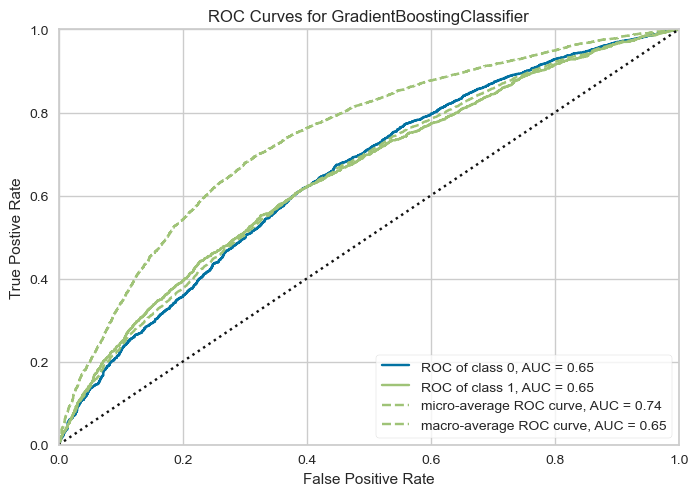

In [68]:
plot_model(tuned_gbc)

In [69]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# saving the model



In [71]:
# Setting up Environment

print(f'for model X_1 details are: ')
clf1 = setup(data = X_1, target = 'cardio_disease', train_size = 0.75, sampling = True, sample_estimator = None, 
             categorical_features = None, ordinal_features = None,
             high_cardinality_features = None,normalize = True, transformation = True, pca = True, 
             pca_components = None, ignore_low_variance = False, combine_rare_levels = False, 
             rare_level_threshold = 0.10, bin_numeric_features = None, remove_outliers = False, 
             outliers_threshold = 0.05, remove_multicollinearity = False, multicollinearity_threshold = 0.9, 
             create_clusters = False, cluster_iter = 20, polynomial_features = False, polynomial_degree = 2, 
             trigonometry_features = False, polynomial_threshold = 0.1, group_features = None, group_names = None, 
             feature_selection = True, feature_selection_threshold = 0.8, feature_interaction = False, 
             feature_ratio = False, interaction_threshold = 0.01, session_id = None)

# Compare Models
print(f'for model X_1 details are: ')
compare_models(blacklist = None, fold = 10,  round = 4, turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.838700,0.557700,1.000000,0.838700,0.912300,0.000000
1,Naive Bayes,0.838700,0.550100,1.000000,0.838700,0.912300,0.000000
2,SVM - Linear Kernel,0.838700,0.000000,1.000000,0.838700,0.912300,0.000000
3,Ridge Classifier,0.838700,0.000000,1.000000,0.838700,0.912300,0.000000
4,Linear Discriminant Analysis,0.838700,0.557800,1.000000,0.838700,0.912300,0.000000
5,Extreme Gradient Boosting,0.838200,0.542700,0.999200,0.838800,0.912000,0.000200
6,Ada Boost Classifier,0.837300,0.534200,0.997000,0.839300,0.911400,0.006300
7,Gradient Boosting Classifier,0.837200,0.544800,0.997200,0.839100,0.911300,0.004200
8,Light Gradient Boosting Machine,0.837200,0.520000,0.997300,0.839000,0.911300,0.002800
9,CatBoost Classifier,0.836700,0.528900,0.996600,0.838900,0.911000,0.002500
